# Brainster Academy Final Project
### Team 3: Tatjana Veljkovic, Ilija Todorov, Ivana Tomovska Efremov

### Part Two

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from datetime import date

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [195]:
import string
import nltk
nltk.download('punkt')
import re
from string import punctuation
from nltk.tokenize import WordPunctTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\todor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Read all years 2011-2015
#### By creating a list of all years, we can later choose which year to work with and it makes the procedure easier

In [197]:
List_of_all_files = ['PrvDel','PrvDel_2011','PrvDel_2012','PrvDel_2013','PrvDel_2014','PrvDel_2015']

In [198]:
Working_file = List_of_all_files[4] #Chose file for working

### Read year 2014

In [199]:
twitter_health = pd.read_csv(Working_file + '.csv')

In [200]:
twitter_health.head(5)

,Number,Date_Time,info,source,Core_info_final,year
0,550314934601383936,2014-12-31 15:37:59+00:00,Experimental drug for UK Ebola nurse http://bb...,bbchealth,Experimental drug for UK Ebola nurse,2014
1,550221415426039808,2014-12-31 09:26:22+00:00,Ebola screening tests under scrutiny http://bb...,bbchealth,Ebola screening tests under scrutiny,2014
2,550193117714849793,2014-12-31 07:33:56+00:00,VIDEO: UK Ebola screening under scrutiny http:...,bbchealth,VIDEO: UK Ebola screening under scrutiny,2014
3,550071243576074240,2014-12-30 23:29:38+00:00,Frontline NHS staff given honours http://bbc.i...,bbchealth,Frontline NHS staff given honours,2014
4,549985974650798081,2014-12-30 17:50:49+00:00,Plasma treatment for UK Ebola patient http://b...,bbchealth,Plasma treatment for UK Ebola patient,2014


In [201]:
twitter_health.shape

(25995, 6)

## Step 1: NLP Text Processing
#### Tokenization, POS tagging, normalization, stemming and lemmatization

#### Adding the tweets' text to list for further processing

In [202]:
col_list = twitter_health.Core_info_final.values.tolist()
#print(col_list)
print(len(col_list))
print(col_list [:10])
col_list[0] += "52"

25995
['Experimental drug for UK Ebola nurse ', 'Ebola screening tests under scrutiny ', 'VIDEO: UK Ebola screening under scrutiny ', 'Frontline NHS staff given honours ', 'Plasma treatment for UK Ebola patient ', 'First Ebola case linked to bat play ', 'VIDEO: How trials helped patients in 2014 ', 'Ebola patient arrives in London ', 'Are we too obsessed with NHS targets? ', 'Prescription fraud plan criticised ']


#### Removing punctutation, strip, lowercaseing

In [203]:
new_list = []

for s in col_list:
    tmp = ""
    for el in s:
        if el in string.printable and el not in string.digits and el not in string.punctuation:
                tmp += el
    if len(tmp) > 0:
        new_list.append(tmp.strip().lower())

In [204]:
#med_dict = pd.read_csv('medical_dictionary.csv')

In [205]:
#med_dict

In [206]:
print(new_list[:20])

['experimental drug for uk ebola nurse', 'ebola screening tests under scrutiny', 'video uk ebola screening under scrutiny', 'frontline nhs staff given honours', 'plasma treatment for uk ebola patient', 'first ebola case linked to bat play', 'video how trials helped patients in', 'ebola patient arrives in london', 'are we too obsessed with nhs targets', 'prescription fraud plan criticised', 'video ebola patient to be flown to london', 'ebola case confirmed in glasgow', 'righttodie campaigner purdy dies', 'video smoking rots you from the inside', 'video robotassisted surgery gains ground', 'smoking rot highlighted in campaign', 'target drunks aampe boss urges police', 'why are so many drinks flavoured with honey', 'ebola how does it compare', 'whooping cough virus evolving fast']


In [207]:
#col_list = [''.join(c for c in s if c not in med_dict['wordlist']) for s in col_list]

In [208]:
col_list = new_list

In [209]:
print(new_list[:10])
print(col_list[:10])

['experimental drug for uk ebola nurse', 'ebola screening tests under scrutiny', 'video uk ebola screening under scrutiny', 'frontline nhs staff given honours', 'plasma treatment for uk ebola patient', 'first ebola case linked to bat play', 'video how trials helped patients in', 'ebola patient arrives in london', 'are we too obsessed with nhs targets', 'prescription fraud plan criticised']
['experimental drug for uk ebola nurse', 'ebola screening tests under scrutiny', 'video uk ebola screening under scrutiny', 'frontline nhs staff given honours', 'plasma treatment for uk ebola patient', 'first ebola case linked to bat play', 'video how trials helped patients in', 'ebola patient arrives in london', 'are we too obsessed with nhs targets', 'prescription fraud plan criticised']


### TOKENIZATION

In [210]:
tokenizer = WordPunctTokenizer()

In [211]:
col_list_tokenized = [tokenizer.tokenize(el) for el in col_list]
print('col_list tokenized:', col_list_tokenized[:10])
#col_list = WordPunctTokenizer().tokenize(col_list)
print('-------')
print('col_list:',col_list[:10])
print(len(col_list))

col_list tokenized: [['experimental', 'drug', 'for', 'uk', 'ebola', 'nurse'], ['ebola', 'screening', 'tests', 'under', 'scrutiny'], ['video', 'uk', 'ebola', 'screening', 'under', 'scrutiny'], ['frontline', 'nhs', 'staff', 'given', 'honours'], ['plasma', 'treatment', 'for', 'uk', 'ebola', 'patient'], ['first', 'ebola', 'case', 'linked', 'to', 'bat', 'play'], ['video', 'how', 'trials', 'helped', 'patients', 'in'], ['ebola', 'patient', 'arrives', 'in', 'london'], ['are', 'we', 'too', 'obsessed', 'with', 'nhs', 'targets'], ['prescription', 'fraud', 'plan', 'criticised']]
-------
col_list: ['experimental drug for uk ebola nurse', 'ebola screening tests under scrutiny', 'video uk ebola screening under scrutiny', 'frontline nhs staff given honours', 'plasma treatment for uk ebola patient', 'first ebola case linked to bat play', 'video how trials helped patients in', 'ebola patient arrives in london', 'are we too obsessed with nhs targets', 'prescription fraud plan criticised']
25995


### Part-of-speech tagging (POS tagging)

In [212]:
col_list_postagged = nltk.pos_tag_sents(col_list_tokenized)

In [213]:
print(col_list_postagged[:10])

[[('experimental', 'JJ'), ('drug', 'NN'), ('for', 'IN'), ('uk', 'JJ'), ('ebola', 'NN'), ('nurse', 'NN')], [('ebola', 'NN'), ('screening', 'VBG'), ('tests', 'NNS'), ('under', 'IN'), ('scrutiny', 'NN')], [('video', 'NN'), ('uk', 'JJ'), ('ebola', 'NN'), ('screening', 'VBG'), ('under', 'IN'), ('scrutiny', 'NN')], [('frontline', 'JJ'), ('nhs', 'JJ'), ('staff', 'NN'), ('given', 'VBN'), ('honours', 'NNS')], [('plasma', 'NN'), ('treatment', 'NN'), ('for', 'IN'), ('uk', 'JJ'), ('ebola', 'NN'), ('patient', 'NN')], [('first', 'RB'), ('ebola', 'JJ'), ('case', 'NN'), ('linked', 'VBD'), ('to', 'TO'), ('bat', 'VB'), ('play', 'NN')], [('video', 'NN'), ('how', 'WRB'), ('trials', 'NNS'), ('helped', 'VBD'), ('patients', 'NNS'), ('in', 'IN')], [('ebola', 'JJ'), ('patient', 'NN'), ('arrives', 'VBZ'), ('in', 'IN'), ('london', 'NN')], [('are', 'VBP'), ('we', 'PRP'), ('too', 'RB'), ('obsessed', 'VBD'), ('with', 'IN'), ('nhs', 'JJ'), ('targets', 'NNS')], [('prescription', 'NN'), ('fraud', 'NN'), ('plan', 'NN')

In [214]:
def get_minimal_pos_tag(raw_tag: str ) -> str:
  if raw_tag.startswith("N"):
    return 'n'
  if raw_tag.startswith("V"):
    return 'v'
  if raw_tag.startswith("J"):
    return 'a'
  return None

### LEMMATIZATION

In [216]:
list_tweets = []
for el in col_list_postagged:
    tweet = []
    for i in el:
        if get_minimal_pos_tag(i[1]) is not None:
            t = WordNetLemmatizer().lemmatize(i[0],pos=get_minimal_pos_tag(i[1]))  
            tweet.append(t)
        else:
            t = WordNetLemmatizer().lemmatize(i[0])
            tweet.append(t)
    list_tweets.append(tweet)

In [217]:
display(list_tweets[:10])

[['experimental', 'drug', 'for', 'uk', 'ebola', 'nurse'],
 ['ebola', 'screen', 'test', 'under', 'scrutiny'],
 ['video', 'uk', 'ebola', 'screen', 'under', 'scrutiny'],
 ['frontline', 'nhs', 'staff', 'give', 'honour'],
 ['plasma', 'treatment', 'for', 'uk', 'ebola', 'patient'],
 ['first', 'ebola', 'case', 'link', 'to', 'bat', 'play'],
 ['video', 'how', 'trial', 'help', 'patient', 'in'],
 ['ebola', 'patient', 'arrive', 'in', 'london'],
 ['be', 'we', 'too', 'obsess', 'with', 'nhs', 'target'],
 ['prescription', 'fraud', 'plan', 'criticise']]

### Stop words removal

In [218]:
stop_words1 = stopwords.words('english') 
stop_words1.extend(['good', 'today', 'way', 'day', 'healthy', 'healthtalk', 'find', 'make', 'risk', 'report', 'video', 'audio', 'health', 'hospital', 'study','may','say','help','patient','doctor', 'hospital', 'new','rt','u', 'amp', 'q', 'nh', 'nhs','gdnhealthcare', 'w', 'pm', 'gt', 'c', 'dr', 'wsj', 'er', 'gp', 'b', 'k', 'pharmalittle', 'va', 'gop', 'mt', 'hn', 'st', 'healthtotalwellness', 'la', 'hhs', 'ab', 'th',  'cnn', 'goodhealth', 'cynthiasass', 'faq', 'live', 'chat', 'well', 'lauralandrowsj', 'stefanei', 'pharmalot', 'may', 'thing', 'new', 'try', 'show', 'get', 'say', 'one', 'case', 'ask', 'well', 'woman']) 
# case ask well woman
 
list_cleaned_stopwords = []
for el in list_tweets:
    single_tweet = []
    for i in el:
        if i not in stop_words1:
            single_tweet.append(i)
        else:
            continue
    list_cleaned_stopwords.append(single_tweet)

In [219]:
display(list_cleaned_stopwords[:10])

[['experimental', 'drug', 'uk', 'ebola', 'nurse'],
 ['ebola', 'screen', 'test', 'scrutiny'],
 ['uk', 'ebola', 'screen', 'scrutiny'],
 ['frontline', 'staff', 'give', 'honour'],
 ['plasma', 'treatment', 'uk', 'ebola'],
 ['first', 'ebola', 'link', 'bat', 'play'],
 ['trial'],
 ['ebola', 'arrive', 'london'],
 ['obsess', 'target'],
 ['prescription', 'fraud', 'plan', 'criticise']]

### Text cleaning example

In [221]:
print('Preprocessed tweet:', twitter_health['Core_info_final'][6])
print('  ')
print('Removed punctuation, strip, lowering:', col_list[6])
print('  ')
print('After tokenization:', col_list_tokenized[6])
print('  ')
print('After Part-of-speech tagging:', col_list_postagged[6])
print('  ')
print('After lemmatization:', list_tweets[6])
print('  ')
print('After stop words removal:', list_cleaned_stopwords[6])

Preprocessed tweet: VIDEO: How trials helped patients in 2014 
  
Removed punctuation, strip, lowering: video how trials helped patients in
  
After tokenization: ['video', 'how', 'trials', 'helped', 'patients', 'in']
  
After Part-of-speech tagging: [('video', 'NN'), ('how', 'WRB'), ('trials', 'NNS'), ('helped', 'VBD'), ('patients', 'NNS'), ('in', 'IN')]
  
After lemmatization: ['video', 'how', 'trial', 'help', 'patient', 'in']
  
After stop words removal: ['trial']


#### Returning to list of strings (previously a list of lists)

In [223]:
list_of_strings = []
for element in list_cleaned_stopwords:  
    str1 = "" 
    for ele in element:
        str1 += ele + ' '
    list_of_strings.append(str1.strip())
print(list_of_strings[:10])

['experimental drug uk ebola nurse', 'ebola screen test scrutiny', 'uk ebola screen scrutiny', 'frontline staff give honour', 'plasma treatment uk ebola', 'first ebola link bat play', 'trial', 'ebola arrive london', 'obsess target', 'prescription fraud plan criticise']


In [224]:
len(list_of_strings)

25995

### Word count

In [225]:
joint_phrases = ""
for phrase in list_of_strings:
    joint_phrases += " " + phrase
word_count_df = pd.DataFrame(pd.DataFrame(joint_phrases.split(" ")).value_counts(), columns=['cnt'], dtype=str).reset_index().rename(columns={0:'words'})
#word_count_df = word_count_df.loc[(~word_count_df['words'].str.strip().isin(stop_words)) & (~word_count_df['words'].str.strip().isin(list(punctuation)))]
pd.options.display.max_rows=100
print(word_count_df.iloc[:30, :])
#print(word_count_df.iloc[900 : 1000])

        words   cnt
0       ebola  3754
1        drug  1195
2      cancer   909
3        care   780
4   stefaniei   715
5        test   536
6       death   528
7      people   521
8        year   505
9        food   504
10      could   499
11        use   473
12       need   458
13       plan   445
14   outbreak   442
15       take   440
16        law   430
17        fda   428
18       work   428
19    medical   422
20       dont   414
21        kid   405
22        see   403
23       life   400
24         go   396
25      fight   387
26    disease   372
27       know   370
28  treatment   367
29       time   363


In [226]:
word_count_df

,words,cnt
0,ebola,3754
1,drug,1195
2,cancer,909
3,care,780
4,stefaniei,715
...,...,...
17311,irishhospice,1
17312,irishinspired,1
17313,irk,1
17314,ironclad,1


In [227]:
word_count_df_20 = word_count_df.iloc[:20]

In [228]:
word_count_df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   20 non-null     object
 1   cnt     20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [229]:
word_count_df_20.loc[:,('cnt')] = word_count_df_20['cnt'].astype('int') 

C:\Users\todor\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [230]:
word_count_df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   20 non-null     object
 1   cnt     20 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 368.0+ bytes


<AxesSubplot:xlabel='words'>

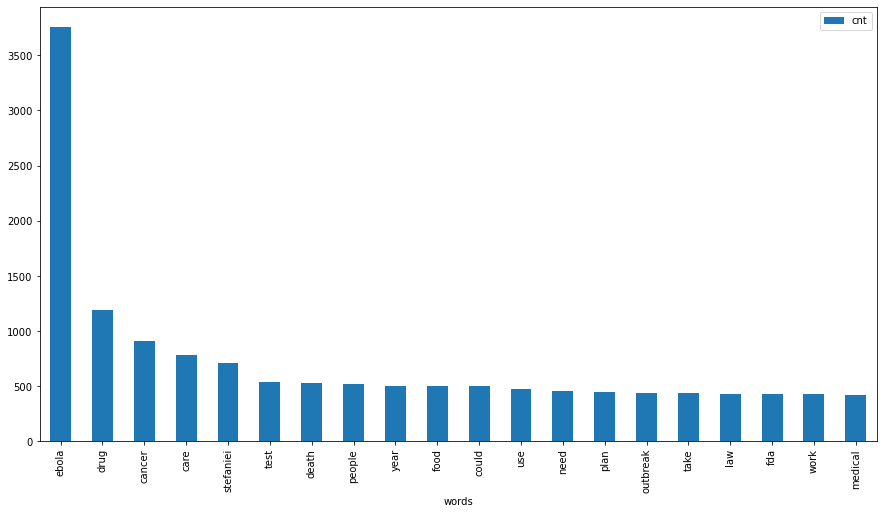

In [231]:
#word_count_df_20.plot(kind='bar',x='words',y='cnt',figsize=(15,8))

word_count_df_20.sort_values(by=['cnt'], ascending=True).plot(kind='barh', x='words',y='cnt', 
                      title = 'Most frequent terms', xlabel = 'Terms', ylabel = 'Frequency', 
                      color = 'green', 
                      figsize=(15,8))

## Step 2: Applying Vector-space models (vectorization)
#### Bag Of Words (BOW) and
#### Term Frequency Inverse Document Frequency (TFIDF)

### Bag of words

#### Bag of words vector initililization

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(
                            ngram_range=(1, 3),
                            analyzer='word',
                            strip_accents = 'unicode',
                            min_df=100
                            )
bow = count_vect.fit_transform(list_of_strings)
bow.shape

(25995, 320)

In [233]:
bow[0]

<1x320 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [234]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()

In [235]:
#first 10 columns generated by BOW
terms[1:10]

['aca',
 'add',
 'adult',
 'affect',
 'africa',
 'age',
 'age blog',
 'aid',
 'allergy']

### TFIDF

#### TFIDF vector initililization

In [236]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
                            ngram_range=(1,3),
                            analyzer='word',
                            strip_accents = 'unicode',
                            min_df=100
                            )
tfidf = tfidf_vect.fit_transform(list_of_strings)
tfidf.shape

(25995, 320)

In [237]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [238]:
terms1[1:10]

['aca',
 'add',
 'adult',
 'affect',
 'africa',
 'age',
 'age blog',
 'aid',
 'allergy']

### Doc2Vec Computing Similarity

In [240]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument

In [241]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [242]:
# tagging the data
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(list_of_strings)]

In [243]:
print(tagged_data[:10])

[TaggedDocument(words=['experimental', 'drug', 'uk', 'ebola', 'nurse'], tags=['0']), TaggedDocument(words=['ebola', 'screen', 'test', 'scrutiny'], tags=['1']), TaggedDocument(words=['uk', 'ebola', 'screen', 'scrutiny'], tags=['2']), TaggedDocument(words=['frontline', 'staff', 'give', 'honour'], tags=['3']), TaggedDocument(words=['plasma', 'treatment', 'uk', 'ebola'], tags=['4']), TaggedDocument(words=['first', 'ebola', 'link', 'bat', 'play'], tags=['5']), TaggedDocument(words=['trial'], tags=['6']), TaggedDocument(words=['ebola', 'arrive', 'london'], tags=['7']), TaggedDocument(words=['obsess', 'target'], tags=['8']), TaggedDocument(words=['prescription', 'fraud', 'plan', 'criticise'], tags=['9'])]


In [244]:
# Initializing doc2vec
model_d2v = gensim.models.doc2vec.Doc2Vec(vector_size=30, min_count=2, epochs=30)

In [245]:
# Building the vocabulary of tagged data
model_d2v.build_vocab(tagged_data)

In [246]:
# Training doc2vec
model_d2v.train(tagged_data, total_examples=model_d2v.corpus_count, epochs=30)

In [247]:
# After doc2vec has been trained, save the model
model_d2v.save("d2v_health.model")

In [248]:
# Calling the model
model_d2v = Doc2Vec.load("d2v_health.model")

In [249]:
# Finding the most similar sentence using tags
similar_doc = model_d2v.docvecs.most_similar(1)
print(similar_doc[0])

('23600', 0.8601409792900085)


<ipython-input-249-59295d06f2db>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = model_d2v.docvecs.most_similar(1)


In [251]:
print(list_of_strings[0])
print(list_of_strings[15653])

experimental drug uk ebola nurse
nprscience look editorial multimedia intern pay summer deadline apply


In [252]:
# Finding the most similar sentence using tags
similar_doc = model_d2v.docvecs.most_similar('71')
print(similar_doc[0])

('222', 0.965633749961853)


<ipython-input-252-f415d25e636e>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = model_d2v.docvecs.most_similar('71')


In [254]:
from scipy import spatial

In [256]:
result = 1 - spatial.distance.cosine(model_d2v[0], model_d2v[71]) 

In [257]:
result

0.30271363258361816

## Step 3: Clustering

### Applying K-means clustering using BOW

In [258]:
clusters = 8

In [259]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = clusters,init='k-means++', random_state=99)
model.fit(bow)

KMeans(random_state=99)

In [260]:
labels_k_bow = model.labels_
cluster_center=model.cluster_centers_

In [261]:
cluster_center

array([[0.        , 0.01004016, 0.        , ..., 0.00401606, 0.06425703,
        0.0060241 ],
       [0.00157729, 0.00315457, 0.00473186, ..., 0.00157729, 0.0126183 ,
        0.00473186],
       [0.00650737, 0.00504972, 0.00452913, ..., 0.00338383, 0.00796502,
        0.00687178],
       ...,
       [0.        , 0.        , 0.0017001 , ..., 0.02380143, 0.00102006,
        0.00102006],
       [0.        , 0.        , 0.00226244, ..., 0.00226244, 0.02036199,
        0.00226244],
       [0.        , 0.        , 0.005     , ..., 0.005     , 0.005     ,
        0.01      ]])

In [262]:
print(labels_k_bow)

[4 5 5 ... 2 2 2]


In [263]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels_k_bow, metric='cosine')

In [264]:
# which tells us that clusters are far away from each other 
silhouette_score

0.04817386931978426

### Applying DBSCAN using BOW

In [265]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [266]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 0.1
min_samples = 50

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Compute DBSCAN
db_bow = DBSCAN(eps=epsilon, min_samples=min_samples).fit(bow)
labels_dbscan_bow = db_bow.labels_

no_clusters = len(np.unique(labels_dbscan_bow) )
no_noise = np.sum(np.array(labels_dbscan_bow) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 8
Estimated no. of noise points: 23079


In [267]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: people
 ebola
 young
 insurance
 million
 mental
 dont
 stefaniei
 old
 contact
Cluster 1: need
 change
 know
 care
 dont
 stefaniei
 brain
 job
 healthcare
 late
Cluster 2: care
 stefaniei
 food
 year
 law
 kid
 plan
 could
 death
 work
Cluster 3: ebola
 outbreak
 ebola outbreak
 leone
 sierra leone
 sierra
 africa
 west
 west africa
 liberia
Cluster 4: drug
 ebola
 fda
 experimental
 use
 trial
 stefaniei
 hepatitis
 cost
 price
Cluster 5: ebola
 liberia
 nurse
 worker
 vaccine
 test
 quarantine
 cdc
 fight
 ebola vaccine
Cluster 6: cancer
 breast
 breast cancer
 drug
 cancer drug
 test
 treatment
 rate
 screen
 stefaniei
Cluster 7: alzheimers
 therapy
 disease
 test
 gene
 blood
 brain
 early
 treatment
 cell


### Applying K-means using TFIDF

In [268]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = clusters, random_state=99)
model_tf.fit(tfidf)

KMeans(random_state=99)

In [269]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [270]:
cluster_center_tf

array([[0.        , 0.00125879, 0.00327303, ..., 0.00223389, 0.01009325,
        0.00123484],
       [0.00095723, 0.00043671, 0.00231242, ..., 0.00103149, 0.00164609,
        0.00082938],
       [0.        , 0.00276738, 0.00484616, ..., 0.01352945, 0.00123539,
        0.00935764],
       ...,
       [0.00077345, 0.00238602, 0.01075829, ..., 0.0005263 , 0.01534463,
        0.00221087],
       [0.        , 0.        , 0.00071624, ..., 0.01206697, 0.00048486,
        0.00058614],
       [0.        , 0.        , 0.00534369, ..., 0.        , 0.00096231,
        0.00864065]])

In [271]:
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='cosine')

In [272]:
silhouette_score_tf

0.049692873660751986

### Applying DBSCAN using TFIDF

In [273]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 50

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Compute DBSCAN
db_tfidf = DBSCAN(eps=epsilon, min_samples=min_samples).fit(tfidf)
labels_dbscan_tfidf = db_tfidf.labels_

no_clusters = len(np.unique(labels_dbscan_tfidf) )
no_noise = np.sum(np.array(labels_dbscan_tfidf) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 3


In [274]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: cancer
 care
 breast
 breast cancer
 social
 test
 home
 treatment
 rate
 cost
Cluster 1: drug
 fda
 cancer drug
 cancer
 experimental
 ebola
 trial
 use
 hepatitis
 price
Cluster 2: time
 wait
 first
 people
 ebola
 year
 among
 mental
 think
 holiday
Cluster 3: need
 know
 ebola
 care
 dont
 change
 outbreak
 work
 ebola outbreak
 healthcare
Cluster 4: stefaniei
 kid
 law
 death
 could
 plan
 use
 work
 obamacare
 child
Cluster 5: year
 age
 old
 old age
 old age blog
 age blog
 blog
 five
 last
 young
Cluster 6: ebola
 liberia
 outbreak
 africa
 ebola outbreak
 nurse
 leone
 sierra
 sierra leone
 quarantine
Cluster 7: food
 eat
 safety
 diet
 holiday
 weight
 bad
 fat
 fight
 school


#### Processed text column and clusters in DataFrame - based on K-means clustering using BOW

In [275]:
list_of_strings[:10]

['experimental drug uk ebola nurse',
 'ebola screen test scrutiny',
 'uk ebola screen scrutiny',
 'frontline staff give honour',
 'plasma treatment uk ebola',
 'first ebola link bat play',
 'trial',
 'ebola arrive london',
 'obsess target',
 'prescription fraud plan criticise']

In [276]:
# processed text column from list of strings to list of lists
list_of_list_clusters = []

for element in list_of_strings:
    list_1 = []
    list_1.append(element)
    list_of_list_clusters.append(list_1)
    list_1 = []
print(list_of_list_clusters[:10])

[['experimental drug uk ebola nurse'], ['ebola screen test scrutiny'], ['uk ebola screen scrutiny'], ['frontline staff give honour'], ['plasma treatment uk ebola'], ['first ebola link bat play'], ['trial'], ['ebola arrive london'], ['obsess target'], ['prescription fraud plan criticise']]


In [277]:
len(labels_k_bow)

25995

In [278]:
len(labels_tf)

25995

In [279]:
labels_k_bow = labels_k_bow.tolist()
type(labels_k_bow[0])

int

In [280]:
labels_k_bow[:10]

[4, 5, 5, 2, 5, 5, 2, 5, 2, 2]

In [281]:
# processed clusters label from list of integers to list of lists
list_of_lists_labels = []

for element in labels_k_bow:
    list_1 = []
    list_1.append(element)
    list_of_lists_labels.append(list_1)
    list_1 = []
print(list_of_lists_labels[:10])

[[4], [5], [5], [2], [5], [5], [2], [5], [2], [2]]


In [282]:
tweets_clustered = pd.DataFrame(list_of_list_clusters)
tweets_clustered.rename(columns = {0:'Tweets_cleaned'}, inplace = True)
tweets_clustered[:10]

,Tweets_cleaned
0,experimental drug uk ebola nurse
1,ebola screen test scrutiny
2,uk ebola screen scrutiny
3,frontline staff give honour
4,plasma treatment uk ebola
5,first ebola link bat play
6,trial
7,ebola arrive london
8,obsess target
9,prescription fraud plan criticise


In [283]:
clusters = pd.DataFrame(list_of_lists_labels)
clusters.rename(columns = {0:'Cluster_labels'}, inplace = True)
clusters[:10]

,Cluster_labels
0,4
1,5
2,5
3,2
4,5
5,5
6,2
7,5
8,2
9,2


In [284]:
# merging text column and clusters lables
text_clusters = pd.concat([tweets_clustered,clusters], axis=1)

In [285]:
text_clusters

,Tweets_cleaned,Cluster_labels
0,experimental drug uk ebola nurse,4
1,ebola screen test scrutiny,5
2,uk ebola screen scrutiny,5
3,frontline staff give honour,2
4,plasma treatment uk ebola,5
...,...,...
25990,expect work better year,2
25991,shortens insurance application,2
25992,test confidential,2
25993,delay web host switch,2


#### Merging with the initial dataframe twitter_health

In [286]:
# cheking the lenght before merge
print('Initial DataFrame shape:', twitter_health.shape)
print('Text and clusters labels DataFrame shape:', text_clusters.shape)
assert len(twitter_health) == len(text_clusters)

Initial DataFrame shape: (25995, 6)
Text and clusters labels DataFrame shape: (25995, 2)


In [287]:
tweets_clustered = pd.concat([twitter_health, text_clusters], axis=1)

#### Clustered dataframe for further tweets analysis

In [288]:
tweets_clustered[:10]

,Number,Date_Time,info,source,Core_info_final,year,Tweets_cleaned,Cluster_labels
0,550314934601383936,2014-12-31 15:37:59+00:00,Experimental drug for UK Ebola nurse http://bb...,bbchealth,Experimental drug for UK Ebola nurse,2014,experimental drug uk ebola nurse,4
1,550221415426039808,2014-12-31 09:26:22+00:00,Ebola screening tests under scrutiny http://bb...,bbchealth,Ebola screening tests under scrutiny,2014,ebola screen test scrutiny,5
2,550193117714849793,2014-12-31 07:33:56+00:00,VIDEO: UK Ebola screening under scrutiny http:...,bbchealth,VIDEO: UK Ebola screening under scrutiny,2014,uk ebola screen scrutiny,5
3,550071243576074240,2014-12-30 23:29:38+00:00,Frontline NHS staff given honours http://bbc.i...,bbchealth,Frontline NHS staff given honours,2014,frontline staff give honour,2
4,549985974650798081,2014-12-30 17:50:49+00:00,Plasma treatment for UK Ebola patient http://b...,bbchealth,Plasma treatment for UK Ebola patient,2014,plasma treatment uk ebola,5
5,549924270516609025,2014-12-30 13:45:37+00:00,First Ebola case linked to bat play http://bbc...,bbchealth,First Ebola case linked to bat play,2014,first ebola link bat play,5
6,549896218680107008,2014-12-30 11:54:09+00:00,VIDEO: How trials helped patients in 2014 http...,bbchealth,VIDEO: How trials helped patients in 2014,2014,trial,2
7,549849800854626304,2014-12-30 08:49:42+00:00,Ebola patient arrives in London http://bbc.in/...,bbchealth,Ebola patient arrives in London,2014,ebola arrive london,5
8,549738504419176448,2014-12-30 01:27:27+00:00,Are we too obsessed with NHS targets? http://b...,bbchealth,Are we too obsessed with NHS targets?,2014,obsess target,2
9,549721285945597952,2014-12-30 00:19:02+00:00,Prescription fraud plan criticised http://bbc....,bbchealth,Prescription fraud plan criticised,2014,prescription fraud plan criticise,2


In [289]:
len(tweets_clustered)

25995

In [294]:
tweets_clustered['Date_Time'] = pd.to_datetime(tweets_clustered['Date_Time'], errors='coerce')
tweets_clustered['month'] = tweets_clustered['Date_Time'].dt.month
tweets_clustered['day_of_week'] = tweets_clustered['Date_Time'].apply(lambda time: time.dayofweek)

In [296]:
tweets_clustered.drop(columns=['Number', 'Date_Time', 'info', 'Core_info_final'], inplace=True)

In [297]:
tweets_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25995 entries, 0 to 25994
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          25995 non-null  object
 1   year            25995 non-null  int64 
 2   Tweets_cleaned  25995 non-null  object
 3   Cluster_labels  25995 non-null  int64 
 4   month           25995 non-null  int64 
 5   day_of_week     25995 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


In [298]:
print(type(model_d2v))

<class 'gensim.models.doc2vec.Doc2Vec'>


In [299]:
model_d2v[0].tolist()

[1.3224341869354248,
 -1.869499683380127,
 2.0047855377197266,
 2.9028375148773193,
 -1.578169345855713,
 -0.38636112213134766,
 2.0920233726501465,
 1.4380658864974976,
 -1.7055319547653198,
 -1.2324713468551636,
 0.47958073019981384,
 -0.9692197442054749,
 0.6497284173965454,
 0.34148356318473816,
 -1.5308345556259155,
 -0.308666855096817,
 -3.0196828842163086,
 -1.7101681232452393,
 -3.1440985202789307,
 -3.437072992324829,
 1.7999621629714966,
 0.2726800739765167,
 2.363942861557007,
 3.5121333599090576,
 1.0665760040283203,
 1.7941950559616089,
 0.3611617684364319,
 2.593043088912964,
 0.1398242712020874,
 -1.7683099508285522]

In [300]:
model_d2v[0].shape

(30,)

In [301]:
# for i in tqdm.tqdm(range(len(tweets_clustered))):
#     tweets_clustered['vector'] = tweets_clustered.append(model_d2v[i])

### vezba - da vidime dali ni treba ovaa vezba?

In [302]:
vector_lists = []

for i in range(0,5):
    vector_lists.append(model_d2v[i].tolist())

In [303]:
#vector_lists[0]

In [304]:
df = tweets_clustered[:5]

In [305]:
df['vectors'] = vector_lists

<ipython-input-305-9e4392e5d2cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vectors'] = vector_lists


In [306]:
df

,source,year,Tweets_cleaned,Cluster_labels,month,day_of_week,vectors
0,bbchealth,2014,experimental drug uk ebola nurse,4,12,2,"[1.3224341869354248, -1.869499683380127, 2.004..."
1,bbchealth,2014,ebola screen test scrutiny,5,12,2,"[-4.0458173751831055, 0.6770950555801392, 1.85..."
2,bbchealth,2014,uk ebola screen scrutiny,5,12,2,"[0.05164700374007225, 1.9403353929519653, -1.8..."
3,bbchealth,2014,frontline staff give honour,2,12,1,"[-0.7532793283462524, -1.0482409000396729, 3.3..."
4,bbchealth,2014,plasma treatment uk ebola,5,12,1,"[-0.5678595900535583, -1.4734452962875366, 1.1..."


### kraj na vezba

In [307]:
vector_lists_2014 = []

for i in tqdm.tqdm(range(len(tweets_clustered))):
    vector_lists_2014.append(model_d2v[i].tolist())

100%|██████████| 25995/25995 [00:00<00:00, 170839.45it/s]


In [308]:
tweets_clustered['vectors'] = vector_lists_2014

In [309]:
tweets_clustered.isna().sum()

source            0
year              0
Tweets_cleaned    0
Cluster_labels    0
month             0
day_of_week       0
vectors           0
dtype: int64

In [310]:
tweets_clustered.shape

(25995, 7)

In [311]:
tweets_clustered.head(5)

,source,year,Tweets_cleaned,Cluster_labels,month,day_of_week,vectors
0,bbchealth,2014,experimental drug uk ebola nurse,4,12,2,"[1.3224341869354248, -1.869499683380127, 2.004..."
1,bbchealth,2014,ebola screen test scrutiny,5,12,2,"[-4.0458173751831055, 0.6770950555801392, 1.85..."
2,bbchealth,2014,uk ebola screen scrutiny,5,12,2,"[0.05164700374007225, 1.9403353929519653, -1.8..."
3,bbchealth,2014,frontline staff give honour,2,12,1,"[-0.7532793283462524, -1.0482409000396729, 3.3..."
4,bbchealth,2014,plasma treatment uk ebola,5,12,1,"[-0.5678595900535583, -1.4734452962875366, 1.1..."


### Y2014 file

In [312]:
NewWorkingFileName = 'VtorDel_' + Working_file.split('_', 1)[1] + '.csv'
NewWorkingFileName

'VtorDel_2014.csv'

In [313]:
tweets_clustered.to_csv(NewWorkingFileName, index=False)

#### End of Part Two and move to Part Three